In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [65]:
bank = pd.read_csv('bank-additional-full.csv', delimiter=';')
df = bank.copy() 

In [66]:
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [68]:
cat_columns = df.select_dtypes(include=object).columns
num_columns = df.select_dtypes(exclude=object).columns

In [69]:
len(cat_columns)

11

In [70]:
for column in cat_columns:
    print(column)
    print(df[column].value_counts())
    print()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

loan
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

contact
cellular     26144
telephone    15044
Name: con

In [71]:
36548/4640

7.876724137931035

In [72]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'duration'}>,
        <AxesSubplot: title={'center': 'campaign'}>],
       [<AxesSubplot: title={'center': 'pdays'}>,
        <AxesSubplot: title={'center': 'previous'}>,
        <AxesSubplot: title={'center': 'emp.var.rate'}>],
       [<AxesSubplot: title={'center': 'cons.price.idx'}>,
        <AxesSubplot: title={'center': 'cons.conf.idx'}>,
        <AxesSubplot: title={'center': 'euribor3m'}>],
       [<AxesSubplot: title={'center': 'nr.employed'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

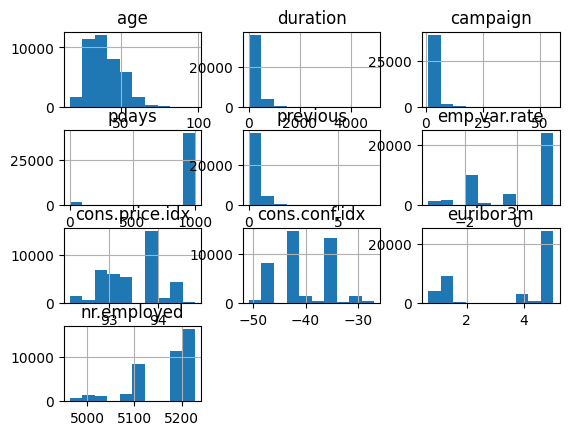

In [73]:
bank.hist()

<AxesSubplot: >

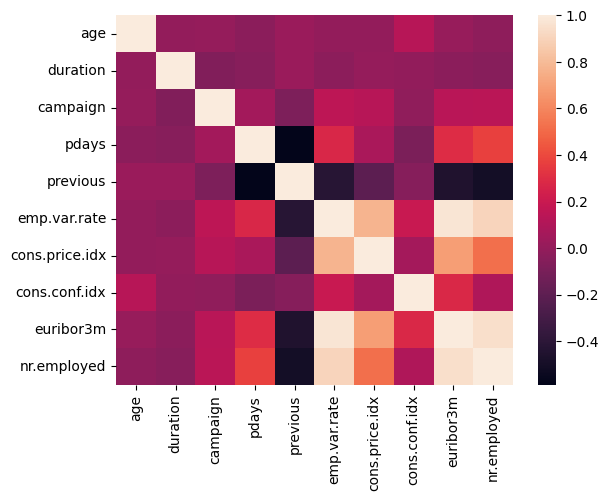

In [74]:
sns.heatmap(df[num_columns].corr())

In [75]:
num_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

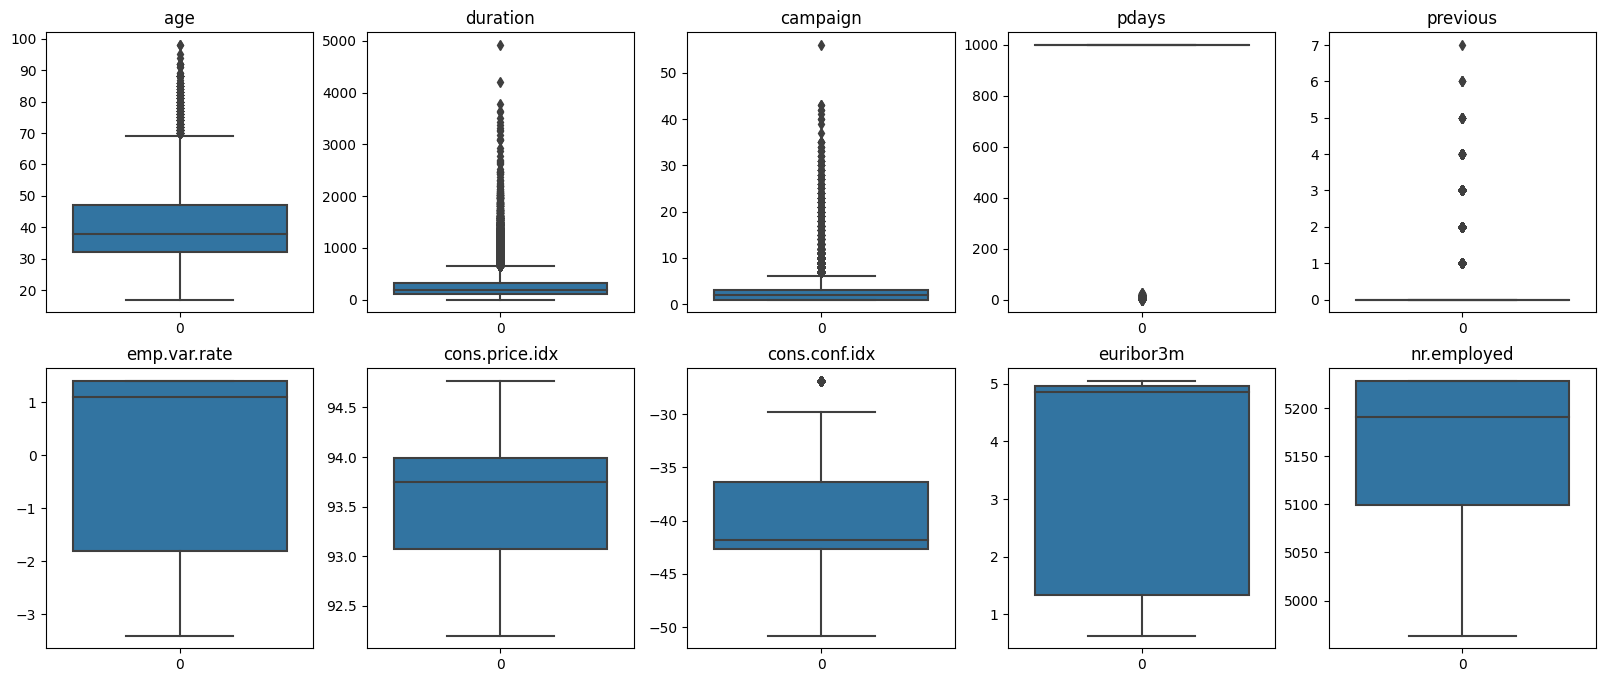

In [83]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, column in enumerate(num_columns):
    sns.boxplot(df[column], ax=axes[i])
    axes[i].set_title(column)
plt.show()

In [9]:
dup_rows = df[df.duplicated()]
dup_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [10]:
df['pdays'].value_counts().sort_index()

0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39673
Name: pdays, dtype: int64

In [11]:
39673/41188

0.9632174419733903

In [12]:
df[df['y'] == 'yes']['duration'].describe()

count    4640.000000
mean      553.191164
std       401.171871
min        37.000000
25%       253.000000
50%       449.000000
75%       741.250000
max      4199.000000
Name: duration, dtype: float64

In [13]:
df[df['y'] == 'no']['duration'].describe()

count    36548.000000
mean       220.844807
std        207.096293
min          0.000000
25%         95.000000
50%        163.500000
75%        279.000000
max       4918.000000
Name: duration, dtype: float64

In [14]:
df[df['y'] == 'yes']['age'].describe()

count    4640.000000
mean       40.913147
std        13.837476
min        17.000000
25%        31.000000
50%        37.000000
75%        50.000000
max        98.000000
Name: age, dtype: float64

In [101]:
df[df['y'] == 'no']['age'].describe()

count    36548.000000
mean        39.911185
std          9.898132
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         95.000000
Name: age, dtype: float64

In [86]:
df['duration'].value_counts().sort_index()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
15       51
16       51
17       58
18       33
19       26
20       30
21       24
22       17
23       16
24       15
25        8
26        8
27       11
28        8
29       10
30        7
31        7
32        4
33        4
34        3
35        5
37        1
39        1
40        2
41        1
42        2
43        2
56        1
Name: campaign, dtype: int64

12 duplicate entries

In [15]:
df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

In [203]:
df['y'] = df['y'].apply(lambda x : 1 if x == 'yes' else 0)

Impute missing values using KNN

# Tests

In [242]:
cat_cols = df.drop(['y'], axis = 1).select_dtypes(include = object).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'Age bracket'],
      dtype='object')

In [243]:
num_cols = df.select_dtypes(exclude = object).columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'day_week', 'month_'],
      dtype='object')

### Categorical

In [244]:
from scipy.stats import chi2_contingency

significant_columns = []
for column in cat_cols:
    contigency = pd.crosstab(df['y'], df[column])
    contigency
    c, p, dof, exp = chi2_contingency(contigency)
    if p < .05:
        significant_columns.append(column)
    print(column, p)

job 4.189763287563861e-199
marital 2.068014648442211e-26
education 3.3051890144025054e-38
default 5.1619579513916376e-89
housing 0.05829447669453452
loan 0.5786752870441754
contact 1.5259856523129964e-189
poutcome 0.0
Age bracket 3.467292786898616e-289


here we observe loan and housing are not showing any significant relation with our response variable, so we can drop those.

In [245]:
significant_columns

['job',
 'marital',
 'education',
 'default',
 'contact',
 'poutcome',
 'Age bracket']

In [246]:
cat_columns = significant_columns

### Numerical

In [247]:
from scipy.stats import ttest_ind

In [249]:
significant_n_columns = []
for column in num_cols:
    t_statistic, p_value = ttest_ind(df[df['y'] == 'no'][column], df[df['y'] == 'yes'][column])
    if p_value < 0.05:
        significant_n_columns.append(column)
    print(column, p_value)

age nan
duration nan
campaign nan
pdays nan
previous nan
emp.var.rate nan
cons.price.idx nan
cons.conf.idx nan
euribor3m nan
nr.employed nan
y nan
day_week nan
month_ nan


all variables are significant

#### lets test with linear regression as well

In [16]:
x = df.copy()
x['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
import statsmodels.api as sm

# Fit the linear regression model (using statsmodel since sklearn doesn't provide p-values)
model = sm.OLS(x['y'], x[num_columns]).fit()

coefficients = model.params
p_values = model.pvalues
feature_names = x[num_columns].columns


In [178]:
results = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'P-value': p_values
})

print(results)

### check if there is any sort of ordering in the categorical column

In [17]:
x = df.copy()
x['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [18]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [93]:
print(x.groupby(['pdays'])['y'].mean().sort_values(), '\n')

pdays
20     0.000000
999    0.092582
17     0.250000
1      0.307692
19     0.333333
12     0.448276
4      0.533898
11     0.535714
16     0.545455
9      0.546875
14     0.550000
18     0.571429
10     0.576923
2      0.606557
5      0.630435
22     0.666667
0      0.666667
8      0.666667
7      0.666667
15     0.666667
3      0.678815
6      0.701456
13     0.777778
27     1.000000
21     1.000000
25     1.000000
26     1.000000
Name: y, dtype: float64 



In [188]:
for column in cat_columns:
    print(x.groupby([column])['y'].mean().sort_values(), '\n')

job
blue-collar      0.068951
services         0.081422
entrepreneur     0.085165
housemaid        0.100000
self-employed    0.104856
technician       0.108325
unknown          0.112121
management       0.112175
admin.           0.129667
unemployed       0.142012
retired          0.252619
student          0.314286
Name: y, dtype: float64 

marital
married     0.101561
divorced    0.103231
single      0.140090
unknown     0.150000
Name: y, dtype: float64 

education
basic.9y               0.078246
basic.6y               0.082060
basic.4y               0.102490
high.school            0.108389
professional.course    0.113550
university.degree      0.137208
unknown                0.145087
illiterate             0.222222
Name: y, dtype: float64 

default
yes        0.000000
unknown    0.051536
no         0.128803
Name: y, dtype: float64 

contact
telephone    0.052324
cellular     0.147389
Name: y, dtype: float64 

month
may    0.064357
jul    0.090389
nov    0.101463
jun    0.105115
aug   

In [145]:
x.groupby(['housing'])['y'].mean().sort_values()

housing
unknown    0.108081
no         0.108783
yes        0.116221
Name: y, dtype: float64

### Binning using Weight of Evidence and Information Value

In [19]:
df['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [20]:
labels = ['17-25', '26-35', '36-45','46-60','>60']
cutPoints= [16, 25, 35, 45, 60, 90]
df['Age bracket'] = pd.cut(df['age'], cutPoints, labels = labels)



In [21]:
df_woe = pd.DataFrame(pd.pivot_table(df, index=['y'], values='age', columns=['Age bracket'], aggfunc='count', fill_value=0).T)

In [22]:
total_yes = df_woe['yes'].sum()
total_no = df_woe['no'].sum()
df_woe['woe'] = np.log( (df_woe['yes'] / total_yes)  / (df_woe['no'] / total_no))
df_woe['IV'] = df_woe['woe'] * ((df_woe['yes'] / total_yes) - (df_woe['no'] / total_no))

In [23]:
df_woe

y,no,yes,woe,IV
Age bracket,,,,
17-25,1316,349,0.737488,0.028976
26-35,13104,1740,0.045736,0.000768
36-45,11747,1092,-0.310819,0.026701
46-60,9875,1044,-0.182179,0.008202
>60,490,409,1.884078,0.141019


In [24]:
df_woe['IV'].sum()

0.2056647160655795

we can use this binning as this has an information value of .2, which makes our age bracket a moderate predictor

In [122]:
df[['age','Age bracket']]

,age,Age bracket
0,56,>47
1,57,>47
2,37,33-38
3,40,39-47
4,56,>47
...,...,...
41183,73,>47
41184,46,39-47
41185,56,>47
41186,44,39-47


# Preprocessing

In [76]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [77]:
week_map = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
df['day_week'] = df['day_of_week'].map(week_map)
df.drop('day_of_week', axis=1, inplace=True)

In [78]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [79]:
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct': 10, 'nov': 11, 'dec':12}
df['month_'] = df['month'].map(week_map)
df.drop('month', axis=1, inplace=True)

In [80]:
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,day_week,month_
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,NaN
1,57,services,married,high.school,unknown,no,no,telephone,149,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,NaN
2,37,services,married,high.school,no,yes,no,telephone,226,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,NaN
4,56,services,married,high.school,no,no,yes,telephone,307,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,NaN


In [30]:
df['Age bracket'] = df['Age bracket'].astype(object)

In [31]:
cat_columns = df.select_dtypes(include=object).columns

In [32]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41176, dtype: object

In [212]:
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'Age bracket'],
      dtype='object')

In [216]:
df_encoded = pd.get_dummies(df.drop(['y','age'], axis = 1), columns= cat_columns)

In [217]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   duration                       41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_admin.                     41188 non-null  uint8  
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

# Models

In [218]:
#X = df.drop('y', axis = 1)
X = df_encoded
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [219]:
import xgboost as xbg

In [220]:
xgb_clf = xbg.XGBClassifier()

In [221]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [222]:
pre_ = xgb_clf.predict(X_train)
accuracy_score(y_train, pre_)

0.9624207283928248

In [223]:
pre = xgb_clf.predict(X_test)

In [224]:
f1_score(y_test, pre)

0.5886925795053003

In [225]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, pre_)

array([[24195,   297],
       [  740,  2363]])

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pre)

array([[11608,   448],
       [  728,   809]])

In [95]:
accuracy_score(y_test, pre)

0.9128707042460814

In [98]:
importance = xgb_clf.get_booster().get_score(importance_type='gain')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
print("Feature ranking:")
for i, (feature, score) in enumerate(sorted_importance):
    print(f"{i+1}. Feature {feature}: {score}")

Feature ranking:
1. Feature nr.employed: 127.75838470458984
2. Feature poutcome_success: 28.480283737182617
3. Feature duration: 12.202048301696777
4. Feature cons.conf.idx: 9.114739418029785
5. Feature month_may: 6.45294189453125
6. Feature month_oct: 5.968418598175049
7. Feature emp.var.rate: 5.725308418273926
8. Feature pdays: 4.993633270263672
9. Feature euribor3m: 4.925337791442871
10. Feature cons.price.idx: 4.062889099121094
11. Feature poutcome_failure: 3.934762477874756
12. Feature default_no: 3.7929763793945312
13. Feature contact_cellular: 3.6966235637664795
14. Feature education_basic.6y: 3.270745277404785
15. Feature job_blue-collar: 3.217576503753662
16. Feature day_of_week_tue: 3.120842456817627
17. Feature education_university.degree: 2.973722219467163
18. Feature day_of_week_mon: 2.8898117542266846
19. Feature marital_single: 2.8256876468658447
20. Feature month_jul: 2.812575101852417
21. Feature month_sep: 2.7596676349639893
22. Feature education_basic.4y: 2.720549821

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train, y_train)

/Users/nileshrathi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
pre_ = lr.predict(X_train)

In [103]:
accuracy_score(y_train, pre_)

0.9093413564360024

In [104]:
pre = lr.predict(X_test)
accuracy_score(y_test, pre)

0.9077194789903599

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pre)

array([[11608,   448],
       [  728,   809]])

In [41]:
from sklearn.metrics import recall_score, precision_score

In [42]:
recall_score(y_test, pre)

0.5263500325309044

In [34]:
d = df[['emp.var.rate', 'euribor3m', 'nr.employed']]

In [55]:
X = d.drop(['nr.employed', 'euribor3m'], axis = 1)
y = d['nr.employed']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
X_train

,emp.var.rate
2583,1.1
9408,1.4
28983,-1.8
22711,1.4
30017,-1.8
...,...
6266,1.1
11285,1.4
38169,-3.4
860,1.1


In [60]:
lr.coef_

array([41.91114864])

In [61]:
y_pred = lr.predict(X_test)

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_pred=y_pred, y_true=y_test)

0.825186625165694